# **Data preparation**

In [1]:
DATA_SOURCE = "../../01_data/adult_reconstruction.csv"
FILE_TO_SAVE = "../../01_data/prepared_data.csv"

In [2]:
import pandas as pd
import numpy as np

import preprocessing_utils

1 Physical GPUs, 1 Logical GPUs


2022-11-18 00:31:17.008121: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 00:31:17.579228: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1621 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 860M, pci bus id: 0000:01:00.0, compute capability: 5.0


In [3]:
census_data = pd.read_csv(DATA_SOURCE)

## Overview

In [4]:
census_data.head()

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial


## Dropping (label) outliers

We will drop those records, which are considered to be outliers (i.e. income>99%)

Text(0.5, 1.0, 'Histogram of incomes\n(with outliers)')

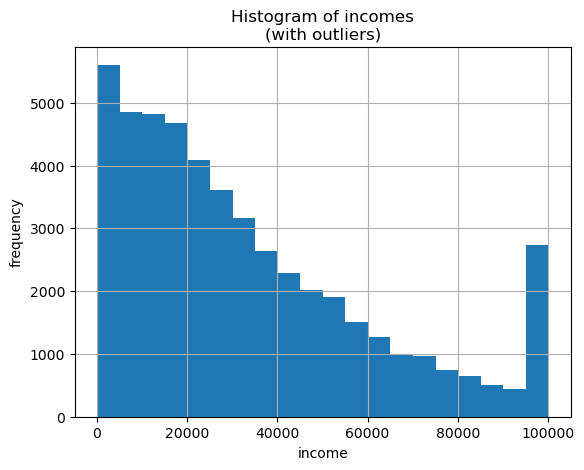

In [5]:
import matplotlib.pyplot as plt
census_data["income"].hist(bins=20)
plt.xlabel("income")
plt.ylabel("frequency")
plt.title("Histogram of incomes\n(with outliers)")

In [6]:
census_data = census_data[census_data["income"] <= census_data["income"].quantile(.99)]

Text(0.5, 1.0, 'Histogram of incomes\n(withot outliers)')

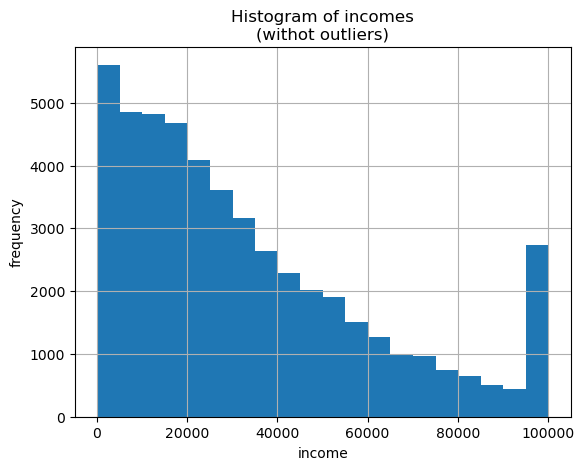

In [7]:
import matplotlib.pyplot as plt
census_data["income"].hist(bins=20)
plt.xlabel("income")
plt.ylabel("frequency")
plt.title("Histogram of incomes\n(withot outliers)")

## Partitioning data

In [8]:
categorical = ["workclass", "marital-status", "relationship", "race", "gender", "native-country", "occupation"]
numeric = ["hours-per-week", "age", "capital-gain", "capital-loss", "education-num"]

In [9]:
under_educated = census_data[census_data["education-num"] < 10]
well_educated = census_data[census_data["education-num"] >= 13]
college_educated = census_data[np.logical_and(census_data["education-num"]>=10,
                                              census_data["education-num"]<13)]

partitioned_dataset = [under_educated, college_educated, well_educated]

In [13]:
partitioned_x = []
partitioned_y = []

for dataset in partitioned_dataset:
    x = dataset.drop(columns=["education", "income"])
    partitioned_x.append(preprocessing_utils.categorical_encoding_and_scaling(x, categorical, numeric))
    partitioned_y.append(preprocessing_utils.normalize_series(dataset["income"]).reshape([len(x), 1]))

## Train/Test splitting

In [15]:
TEST_PORTION = .1
TRAIN_PATH = "../../01_data/train/"
TEST_PATH = "../../01_data/test/"

In [19]:
uned_limit = int(TEST_PORTION*len(partitioned_x[0]))
np.savetxt(TEST_PATH+"under_educated_features.csv", partitioned_x[0][:uned_limit])
np.savetxt(TRAIN_PATH+"under_educated_features.csv", partitioned_x[0][uned_limit:])
np.savetxt(TEST_PATH+"under_educated_labels.csv", partitioned_y[0][:uned_limit])
np.savetxt(TRAIN_PATH+"under_educated_labels.csv", partitioned_y[0][uned_limit:])

well_limit = int(TEST_PORTION*len(partitioned_x[1]))
np.savetxt(TEST_PATH+"well_educated_features.csv", partitioned_x[1][:well_limit])
np.savetxt(TRAIN_PATH+"well_educated_features.csv", partitioned_x[1][well_limit:])
np.savetxt(TEST_PATH+"well_educated_labels.csv", partitioned_y[1][:well_limit])
np.savetxt(TRAIN_PATH+"well_educated_labels.csv", partitioned_y[1][well_limit:])

col_limit = int(TEST_PORTION*len(partitioned_x[2]))
np.savetxt(TEST_PATH+"college_educated_features.csv", partitioned_x[2][:col_limit])
np.savetxt(TRAIN_PATH+"college_educated_features.csv", partitioned_x[2][col_limit:])
np.savetxt(TEST_PATH+"college_educated_labels.csv", partitioned_y[2][:col_limit])
np.savetxt(TRAIN_PATH+"college_educated_labels.csv", partitioned_y[2][col_limit:])